Original Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22775 entries, 0 to 22774
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SL Geounit (Code)            22743 non-null  object 
 1   Month Date                   22775 non-null  object 
 2   SL Sub Business Line (Code)  22775 non-null  object 
 3   GL Account Category          22083 non-null  object 
 4   RPE Revenue                  22775 non-null  float64
dtypes: float64(1), object(4)
memory usage: 889.8+ KB
None

Preprocessed Dataset Info (WLES only):
<class 'pandas.core.frame.DataFrame'>
Index: 4302 entries, 4 to 22774
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   SL Geounit (Code)            4297 non-null   object        
 1   Month Date                   4302 non-null   datetime64[ns]
 2

C:\Users\IWahbi\AppData\Local\Temp\ipykernel_36104\875785949.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = rpe_revenue_df.groupby(['SL Geounit (Code)', pd.Grouper(key='Month Date', freq='M')])['RPE Revenue'].sum().reset_index()


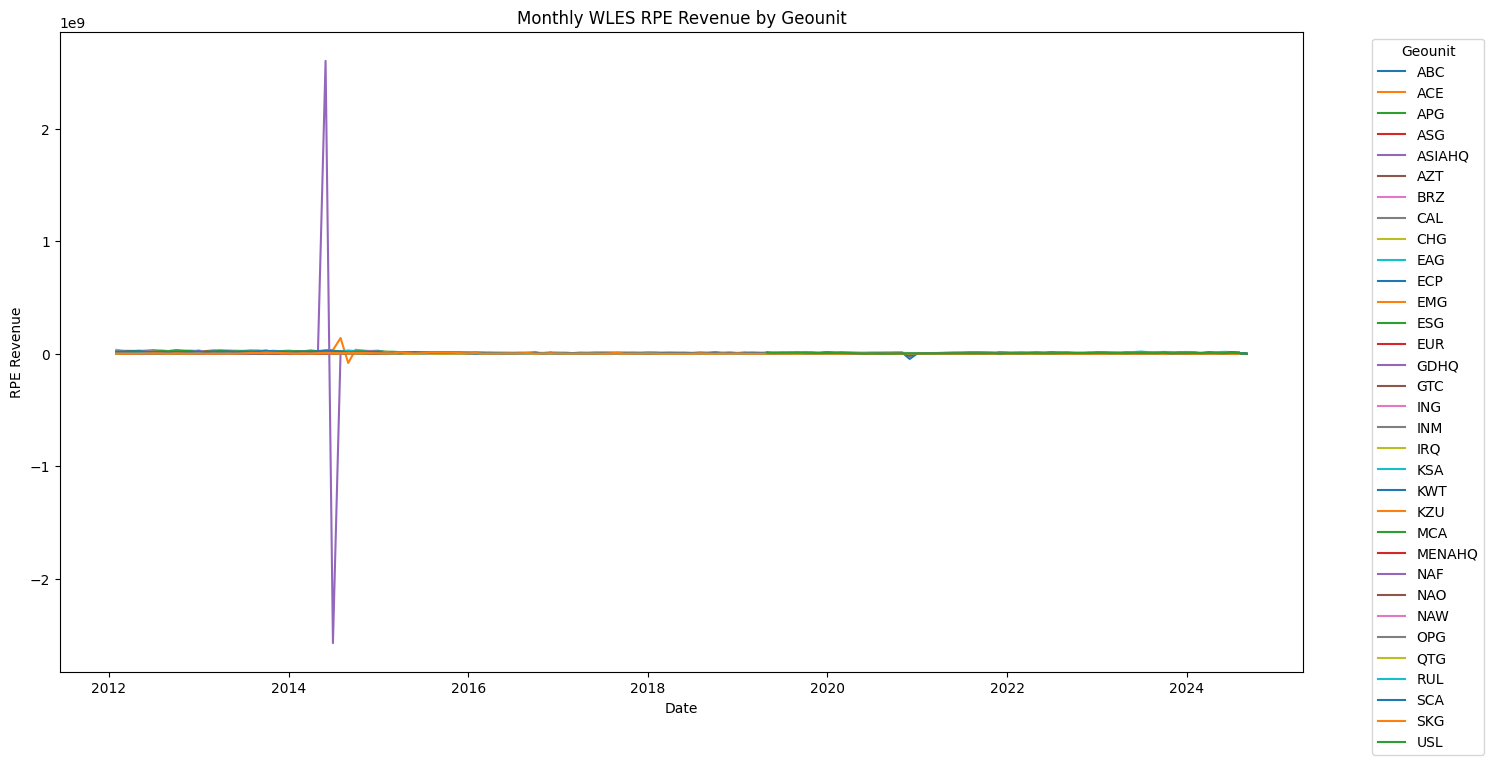


Total WLES Revenue by Geounit:
SL Geounit (Code)
KSA       2.013455e+09
ACE       1.331681e+09
SCA       1.308438e+09
EAG       1.239126e+09
MCA       1.232210e+09
RUL       1.211508e+09
EUR       1.166828e+09
OPG       1.115964e+09
BRZ       1.067366e+09
APG       9.975449e+08
CHG       9.846167e+08
NAF       9.427150e+08
NAW       9.174786e+08
ECP       8.347520e+08
ING       7.291669e+08
ABC       6.546359e+08
INM       6.463540e+08
ESG       6.106823e+08
GTC       5.941951e+08
EMG       5.792784e+08
QTG       5.255854e+08
KZU       5.103875e+08
KWT       4.807664e+08
IRQ       4.305247e+08
SKG       3.691145e+08
NAO       3.637251e+08
ASG       3.240169e+08
USL       3.230624e+08
AZT       2.753400e+08
CAL       1.960766e+07
GDHQ      3.416940e+06
ASIAHQ    0.000000e+00
MENAHQ    0.000000e+00
Name: RPE Revenue, dtype: float64

Summary Statistics:
                          Month Date   RPE Revenue
count                           4297  4.297000e+03
mean   2018-06-23 06:52:11.6732602

In [5]:
# 02_explore_rpe_revenue.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import importlib
import utils.revenue_data_preprocessing as rdp

# Reload the module to ensure we have the latest version
importlib.reload(rdp)

# Load the data
rpe_revenue_df = pd.read_csv('../raw_data/global_rpe_revenue.csv')

# Display basic information about the dataset
print("Original Dataset Info:")
print(rpe_revenue_df.info())

# Apply the preprocessing function (now including WLES filter)
rpe_revenue_df = rdp.preprocess_rpe_data(rpe_revenue_df)

print("\nPreprocessed Dataset Info (WLES only):")
print(rpe_revenue_df.info())

# Group by Geounit and Month, summing the RPE Revenue
monthly_revenue = rpe_revenue_df.groupby(['SL Geounit (Code)', pd.Grouper(key='Month Date', freq='M')])['RPE Revenue'].sum().reset_index()

# Display the first few rows of the grouped data
print("\nFirst few rows of grouped data:")
print(monthly_revenue.head())

# Pivot the data for easier plotting
pivot_revenue = monthly_revenue.pivot(index='Month Date', columns='SL Geounit (Code)', values='RPE Revenue')

# Plot the monthly revenue for each Geounit
plt.figure(figsize=(15, 8))
for geounit in pivot_revenue.columns:
    plt.plot(pivot_revenue.index, pivot_revenue[geounit], label=geounit)

plt.title('Monthly WLES RPE Revenue by Geounit')
plt.xlabel('Date')
plt.ylabel('RPE Revenue')
plt.legend(title='Geounit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Calculate and display total revenue by Geounit
total_revenue_by_geounit = monthly_revenue.groupby('SL Geounit (Code)')['RPE Revenue'].sum().sort_values(ascending=False)
print("\nTotal WLES Revenue by Geounit:")
print(total_revenue_by_geounit)

# Display summary statistics
print("\nSummary Statistics:")
print(monthly_revenue.describe())

# Check for any missing values
print("\nMissing Values:")
print(monthly_revenue.isnull().sum())

# Further analysis can be added here based on specific requirements and insights gained